<a href="https://colab.research.google.com/github/hedaesgo/segmentacion/blob/main/Janica_Hector_Clase_segmentacion_semantica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# YOLOv8 Semantic Segmentation Training Notebook
# ===========================================
# Este notebook está pensado para Google Colab.
# ==================================================
# 1. Instalación de dependencias
# ==================================================
!pip install ultralytics roboflow -q
!pip install dropbox


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 119.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.1/572.1 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.3/162.3 kB 17.0 MB/s eta 0:00:00


In [2]:
# ==================================================
# 2. Importación de librerías
# ==================================================
from ultralytics import YOLO
from roboflow import Roboflow
import os


import requests
import zipfile
import os

# 🔹 Reemplaza este enlace con el tuyo de Dropbox (con dl=1)
dropbox_url = "https://www.dropbox.com/scl/fi/kntp2jzs27vswertyzu2z/carr.v1i.yolov8.zip?rlkey=che66z1ynn1njc1qngk3yrpwd&st=6a394gzz&dl=1"
output_path = "dataset.zip"

# Descargar
r = requests.get(dropbox_url, stream=True)
with open(output_path, "wb") as f:
    for chunk in r.iter_content(chunk_size=8192):
        if chunk:
            f.write(chunk)

print("✅ Dataset descargado:", output_path)

# Crear carpeta destino
extract_dir = "datasets/cars_white_segmentation"
os.makedirs(extract_dir, exist_ok=True)

# Extraer ZIP
with zipfile.ZipFile(output_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("✅ Dataset extraído en:", extract_dir)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✅ Dataset descargado: dataset.zip
✅ Dataset extraído en: datasets/cars_white_segmentation


In [3]:
model = YOLO("yolov8m-seg.pt") # cargar modelo base de segmentación


results = model.train(
data="datasets/cars_white_segmentation/data.yaml", # ruta a tu data.yaml
epochs=50, # número de épocas de entrenamiento
imgsz=640, # tamaño de las imágenes
batch=2, # tamaño del batch
name="cars_white_segmentation" # nombre del experimento
)

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=2, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=datasets/cars_white_segmentation/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=cars_white_segmentation, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, 

In [4]:
# ==================================================
# 5. Validación del modelo
# ==================================================
metrics = model.val()
print(metrics)

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m-seg summary (fused): 105 layers, 27,222,963 parameters, 0 gradients, 104.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2205.1±455.3 MB/s, size: 82.5 KB)
val: Scanning /content/datasets/cars_white_segmentation/valid/labels.cache... 6 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 6/6 12.3Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 4.8it/s 0.6s
                   all          6         60      0.914      0.881      0.958      0.847      0.914      0.881      0.958      0.633
Speed: 3.9ms preprocess, 45.4ms inference, 0.0ms loss, 8.0ms postprocess per image
Results saved to /content/runs/segment/cars_white_segmentation2
ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confu


image 1/1 /content/DJI_imagenes.jpg: 640x640 23 whites, 44.0ms
Speed: 2.0ms preprocess, 44.0ms inference, 13.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/segment/predict


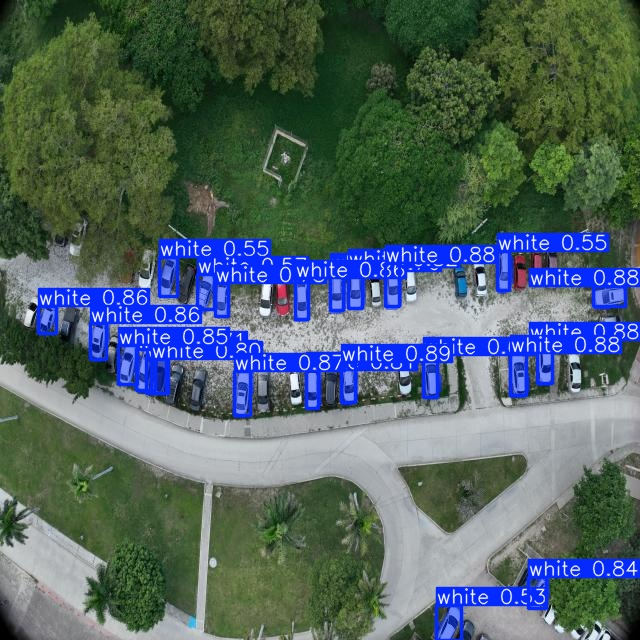

In [5]:
from IPython.display import Image, display
# Cargar el modelo entrenado (ajusta la ruta a tu .pt)
model = YOLO("/content/runs/segment/cars_white_segmentation/weights/best.pt")

# Ruta de la imagen de prueba
test_image = "DJI_imagenes.jpg"

# Realizar predicción
results = model.predict(
    source=test_image,   # Imagen individual
    save=True,           # Guardar resultados
    imgsz=640,           # Tamaño de la imagen
    conf=0.5             # Umbral de confianza
)

# ==================================================
# 7. Visualización de resultados
# ==================================================

# Normalmente YOLO guarda en runs/segment/predict/
# results[0].save_dir devuelve esa ruta automáticamente
predicted_image_path = f"{results[0].save_dir}/DJI_imagenes.jpg"

display(Image(filename=predicted_image_path))

## con video

In [7]:
from ultralytics import YOLO
from IPython.display import Video
import os

# ==================================================
# 1. Cargar el modelo entrenado
# ==================================================
model = YOLO("/content/runs/segment/cars_white_segmentation/weights/best.pt")

# Ruta del video de prueba
test_video = "Vid2.mp4"

# ==================================================
# 2. Realizar predicción sobre el video
# ==================================================
results = model.predict(
    source=test_video,   # archivo de video
    save=True,           # guardar resultados procesados
    imgsz=640,           # tamaño de imagen
    conf=0.5             # confianza mínima
)

# ==================================================
# 3. Ubicar el video procesado (.avi por defecto)
# ==================================================
predicted_video_path = f"{results[0].save_dir}/Vid2.avi"

# ==================================================
# 4. Convertir a MP4 para que Colab pueda reproducirlo
# ==================================================
mp4_path = predicted_video_path.replace(".avi", ".mp4")
!ffmpeg -y -i "$predicted_video_path" -vcodec libx264 "$mp4_path"

# ==================================================
# 5. Mostrar el video procesado dentro de Colab
# ==================================================
Video(mp4_path, embed=True, width=640, height=480)



WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/175) /content/Vid2.mp4: 384x640 17 whites, 34.8ms
video 1/1 (frame 2/175) /content/Vid2.mp4: 384x640 17 whites, 30.0ms
video 1/1 (frame 3/175) /content/Vid2.mp4: 384x640 16 whites, 30.0ms
video 1/1 (frame 4/175) /content/Vid2.mp4: 384x640 16 whites, 30.0ms
video 1/1 (frame 5/175) /content/Vid2.mp4: 384x640 18 whites, 29.9ms
video 1/1 (frame 6/175) /content/Vid2.mp4: 384x640 17 whites, 30.0ms
video 1/1 (frame 7/175) /content/Vid2.mp4:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
